# Plots by the state with relative/absolute numbers of Microsoft AI roads

In [1]:
import os
import json
import pandas as pd
import re
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## Data preparation

### Definitions

In [2]:
# dictionary definitions

data_dic = {0: "roads_continent_data_18-23_ai.json",
            1: "roads_africa_states_18-23_ai.json",
            2: "roads_northamerica_states_18-23_ai.json",
            3: "roads_europe_states_18-23_ai.json",
            4: "roads_asia_states_18-23_ai.json",}
geojson_folder_dic = {0: "geojson-continent-states",
                      1: "geojson-africa-states",
                      2: "geojson-northamerica-states",
                      3: "geojson-europe-states",
                      4: "geojson-asia-states",}

In [3]:
# user input definition

while True:
    try:
        user_d_spec = int(input("Which data do you want to plot?\
                            Enter 0 for stats by continents (2018–2023),\
                            1 for stats by Africa states (2018–2023),\
                            2 for stats by North-Central America states (2018–2023),\
                            3 for stats by Europe states (2018–2023),\
                            4 for stats by Asia states (2018–2023):"
                                ))
    except ValueError:
        print("Please enter a number.")
        continue
    if user_d_spec not in range(len(data_dic)):
        print("Please enter 0, 1, 2, 3 or 4.")
        continue
    break


In [4]:
# function definitions

def data_spec(data_dic):

    try:
        with open(f"downloaded-data\\{data_dic[user_d_spec]}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(home_dir, geojson_folder_dic[user_d_spec], "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [5]:
os.chdir('..')

data = data_spec(data_dic)

home_dir = os.getcwd()


### Edit the obtained data into desired shape to create a DataFrame

In [6]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [7]:
for region in data:
    for dic1 in region:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [8]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

In [9]:
df.dtypes

feature        int64
source        object
timestamp     object
value        float64
year           int64
dtype: object

In [10]:
# handle wrong feature name of Egypt

# if user_d_spec == 1:
#     df.loc[df["feature"] == "feature1", "feature"] = 46


In [11]:
# df

### Append the names of the regions to the DataFrame

In [12]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic)


['0_United Kingdom.geojson', '10_Norway.geojson', '11_Sweden.geojson', '12_Finland.geojson', '13_Luxembourg.geojson', '14_Belgium.geojson', '15_North Macedonia.geojson', '16_Albania.geojson', '17_Kosovo.geojson', '18_Spain.geojson', '19_Denmark.geojson', '1_France.geojson', '20_Romania.geojson', '21_Hungary.geojson', '22_Slovakia.geojson', '23_Poland.geojson', '24_Ireland.geojson', '25_Greece.geojson', '26_Austria.geojson', '27_Italy.geojson', '28_Switzerland.geojson', '29_Liechtenstein.geojson', '2_Ukraine.geojson', '30_Serbia.geojson', '31_Croatia.geojson', '32_Slovenia.geojson', '33_Bulgaria.geojson', '34_San Marino.geojson', '35_Monaco.geojson', '36_Andorra.geojson', '37_Montenegro.geojson', '38_Bosnia and Herz..geojson', '39_Portugal.geojson', '3_Belarus.geojson', '40_Moldova.geojson', '41_Vatican.geojson', '42_Iceland.geojson', '43_Malta.geojson', '4_Netherlands.geojson', '5_Lithuania.geojson', '6_Czechia.geojson', '7_Germany.geojson', '8_Estonia.geojson', '9_Latvia.geojson']


In [13]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1] # using lib RegularExpression to separate the ID number and the state name
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [14]:
# merge df with region names based on IDs
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
# df.head(20)

In [15]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,7.428525e+08,2018,0,United Kingdom
1,0,remainder,2019-01-01T00:00:00Z,7.606991e+08,2019,0,United Kingdom
2,0,remainder,2020-01-01T00:00:00Z,7.831856e+08,2020,0,United Kingdom
3,0,remainder,2021-01-01T00:00:00Z,8.145666e+08,2021,0,United Kingdom
4,0,remainder,2022-01-01T00:00:00Z,8.463461e+08,2022,0,United Kingdom
...,...,...,...,...,...,...,...
523,9,source=maxar,2019-01-01T00:00:00Z,0.000000e+00,2019,9,Latvia
524,9,source=maxar,2020-01-01T00:00:00Z,0.000000e+00,2020,9,Latvia
525,9,source=maxar,2021-01-01T00:00:00Z,1.913492e+04,2021,9,Latvia
526,9,source=maxar,2022-01-01T00:00:00Z,3.505722e+04,2022,9,Latvia


### Filtering the data

In [16]:
# get the number of AI  (source=microsoft/BuildingFootprints) / manually mapped (remainder) roads for every year
grouped = df.groupby(["name", "year"])["value"].sum()
# grouped

In [17]:
grouped


name     year
Albania  2018    34623086.20
         2019    36837266.23
         2020    42937862.47
         2021    46480667.58
         2022    47605687.57
                    ...     
Vatican  2019         559.13
         2020         559.13
         2021         559.06
         2022         559.06
         2023         553.36
Name: value, Length: 264, dtype: float64

In [18]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["name", "year"], how="left", )
merged_data = merged_data.rename(columns={"value_x": "len_of_roads", "value_y": "total_roads"})
merged_data["percentage"] = (merged_data["len_of_roads"] / merged_data["total_roads"]) * 100
# merged_data.head(10)


In [19]:
# percentage verification
merged_data.groupby(["name", "year"])["percentage"].sum()


name     year
Albania  2018    100.0
         2019    100.0
         2020    100.0
         2021    100.0
         2022    100.0
                 ...  
Vatican  2019    100.0
         2020    100.0
         2021    100.0
         2022    100.0
         2023    100.0
Name: percentage, Length: 264, dtype: float64

In [25]:
df_ai_rel = merged_data.loc[(merged_data["year"] == 2023) &
                            (merged_data["source"] == "source=maxar"), :]
df_ai_rel.head()


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,644999.82,2023,0,United Kingdom,8.704222e+08,0.074102
23,10,source=maxar,2023-01-01T00:00:00Z,7684.86,2023,10,Norway,2.749523e+08,0.002795
35,11,source=maxar,2023-01-01T00:00:00Z,133353.56,2023,11,Sweden,5.929915e+08,0.022488
47,12,source=maxar,2023-01-01T00:00:00Z,76799.72,2023,12,Finland,5.013806e+08,0.015318
59,13,source=maxar,2023-01-01T00:00:00Z,95.84,2023,13,Luxembourg,1.861471e+07,0.000515


In [26]:
len(df_ai_rel)


44

In [27]:
df_ai_rel


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,644999.82,2023,0,United Kingdom,8.704222e+08,0.074102
23,10,source=maxar,2023-01-01T00:00:00Z,7684.86,2023,10,Norway,2.749523e+08,0.002795
35,11,source=maxar,2023-01-01T00:00:00Z,133353.56,2023,11,Sweden,5.929915e+08,0.022488
47,12,source=maxar,2023-01-01T00:00:00Z,76799.72,2023,12,Finland,5.013806e+08,0.015318
59,13,source=maxar,2023-01-01T00:00:00Z,95.84,2023,13,Luxembourg,1.861471e+07,0.000515
71,14,source=maxar,2023-01-01T00:00:00Z,454.83,2023,14,Belgium,1.947471e+08,0.000234
83,15,source=maxar,2023-01-01T00:00:00Z,11329.04,2023,15,North Macedonia,2.904597e+07,0.039004
95,16,source=maxar,2023-01-01T00:00:00Z,40858.34,2023,16,Albania,4.895529e+07,0.083461
107,17,source=maxar,2023-01-01T00:00:00Z,220211.54,2023,17,Kosovo,2.529909e+07,0.870433
119,18,source=maxar,2023-01-01T00:00:00Z,3032317.76,2023,18,Spain,1.516030e+09,0.200017


### Plots

#### Relative numbers

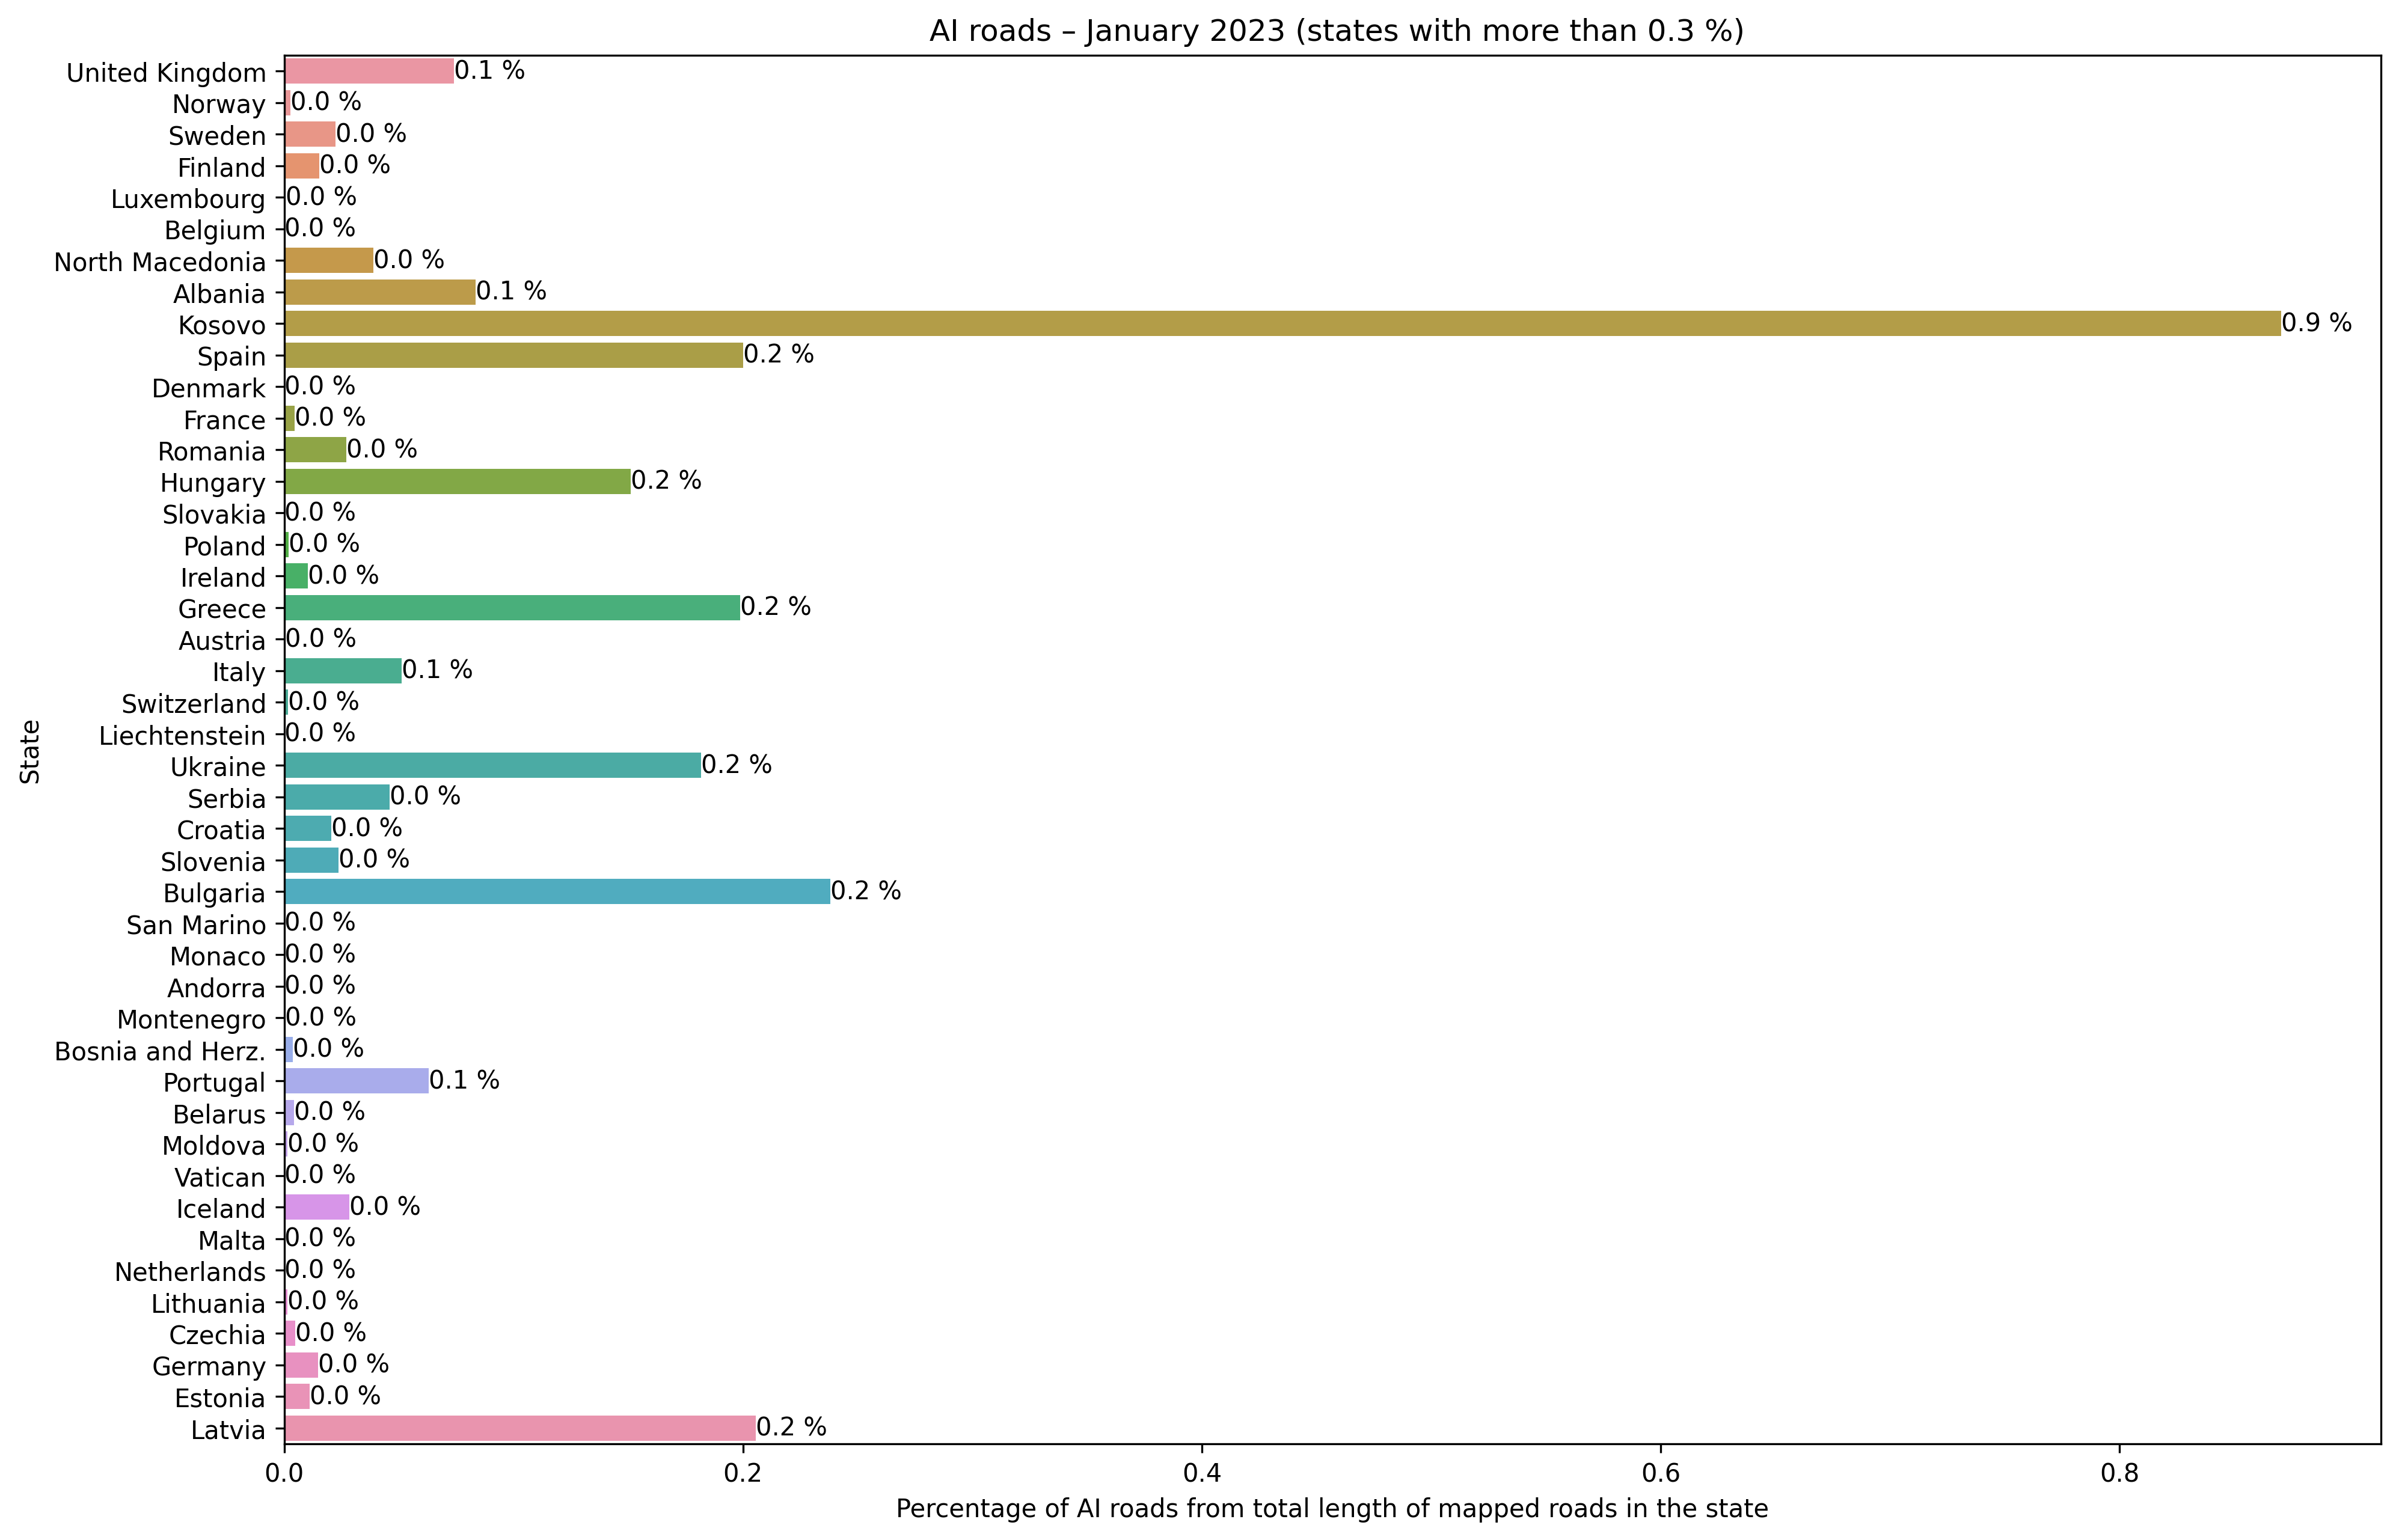

In [28]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

# create horizontal barplot
sns.barplot(x=df_ai_rel["percentage"], y=df_ai_rel["name"], orient='h', ax=ax)


# add percentage labels
for i, percent in enumerate(df_ai_rel["percentage"]):
    if np.isfinite(percent):
        ax.text(percent, i, str(round(percent, 1)) +
                ' %', ha='left', va='center')
        
# Set axis labels and title
ax.set_xlabel('Percentage of AI roads from total length of mapped roads in the state')
ax.set_ylabel('State')
ax.set_title(' AI roads – January 2023 (states with more than 0.3 %)')

plt.show()



#### Absolute numbers

In [30]:
df_ai_abs = merged_data.loc[(merged_data["year"] == 2023) & (merged_data["source"] == "source=maxar") & (merged_data["len_of_roads"] > 100), :]
df_ai_abs.head()


,feature,source,timestamp,len_of_roads,year,id,name,total_roads,percentage
11,0,source=maxar,2023-01-01T00:00:00Z,644999.82,2023,0,United Kingdom,8.704222e+08,0.074102
23,10,source=maxar,2023-01-01T00:00:00Z,7684.86,2023,10,Norway,2.749523e+08,0.002795
35,11,source=maxar,2023-01-01T00:00:00Z,133353.56,2023,11,Sweden,5.929915e+08,0.022488
47,12,source=maxar,2023-01-01T00:00:00Z,76799.72,2023,12,Finland,5.013806e+08,0.015318
71,14,source=maxar,2023-01-01T00:00:00Z,454.83,2023,14,Belgium,1.947471e+08,0.000234


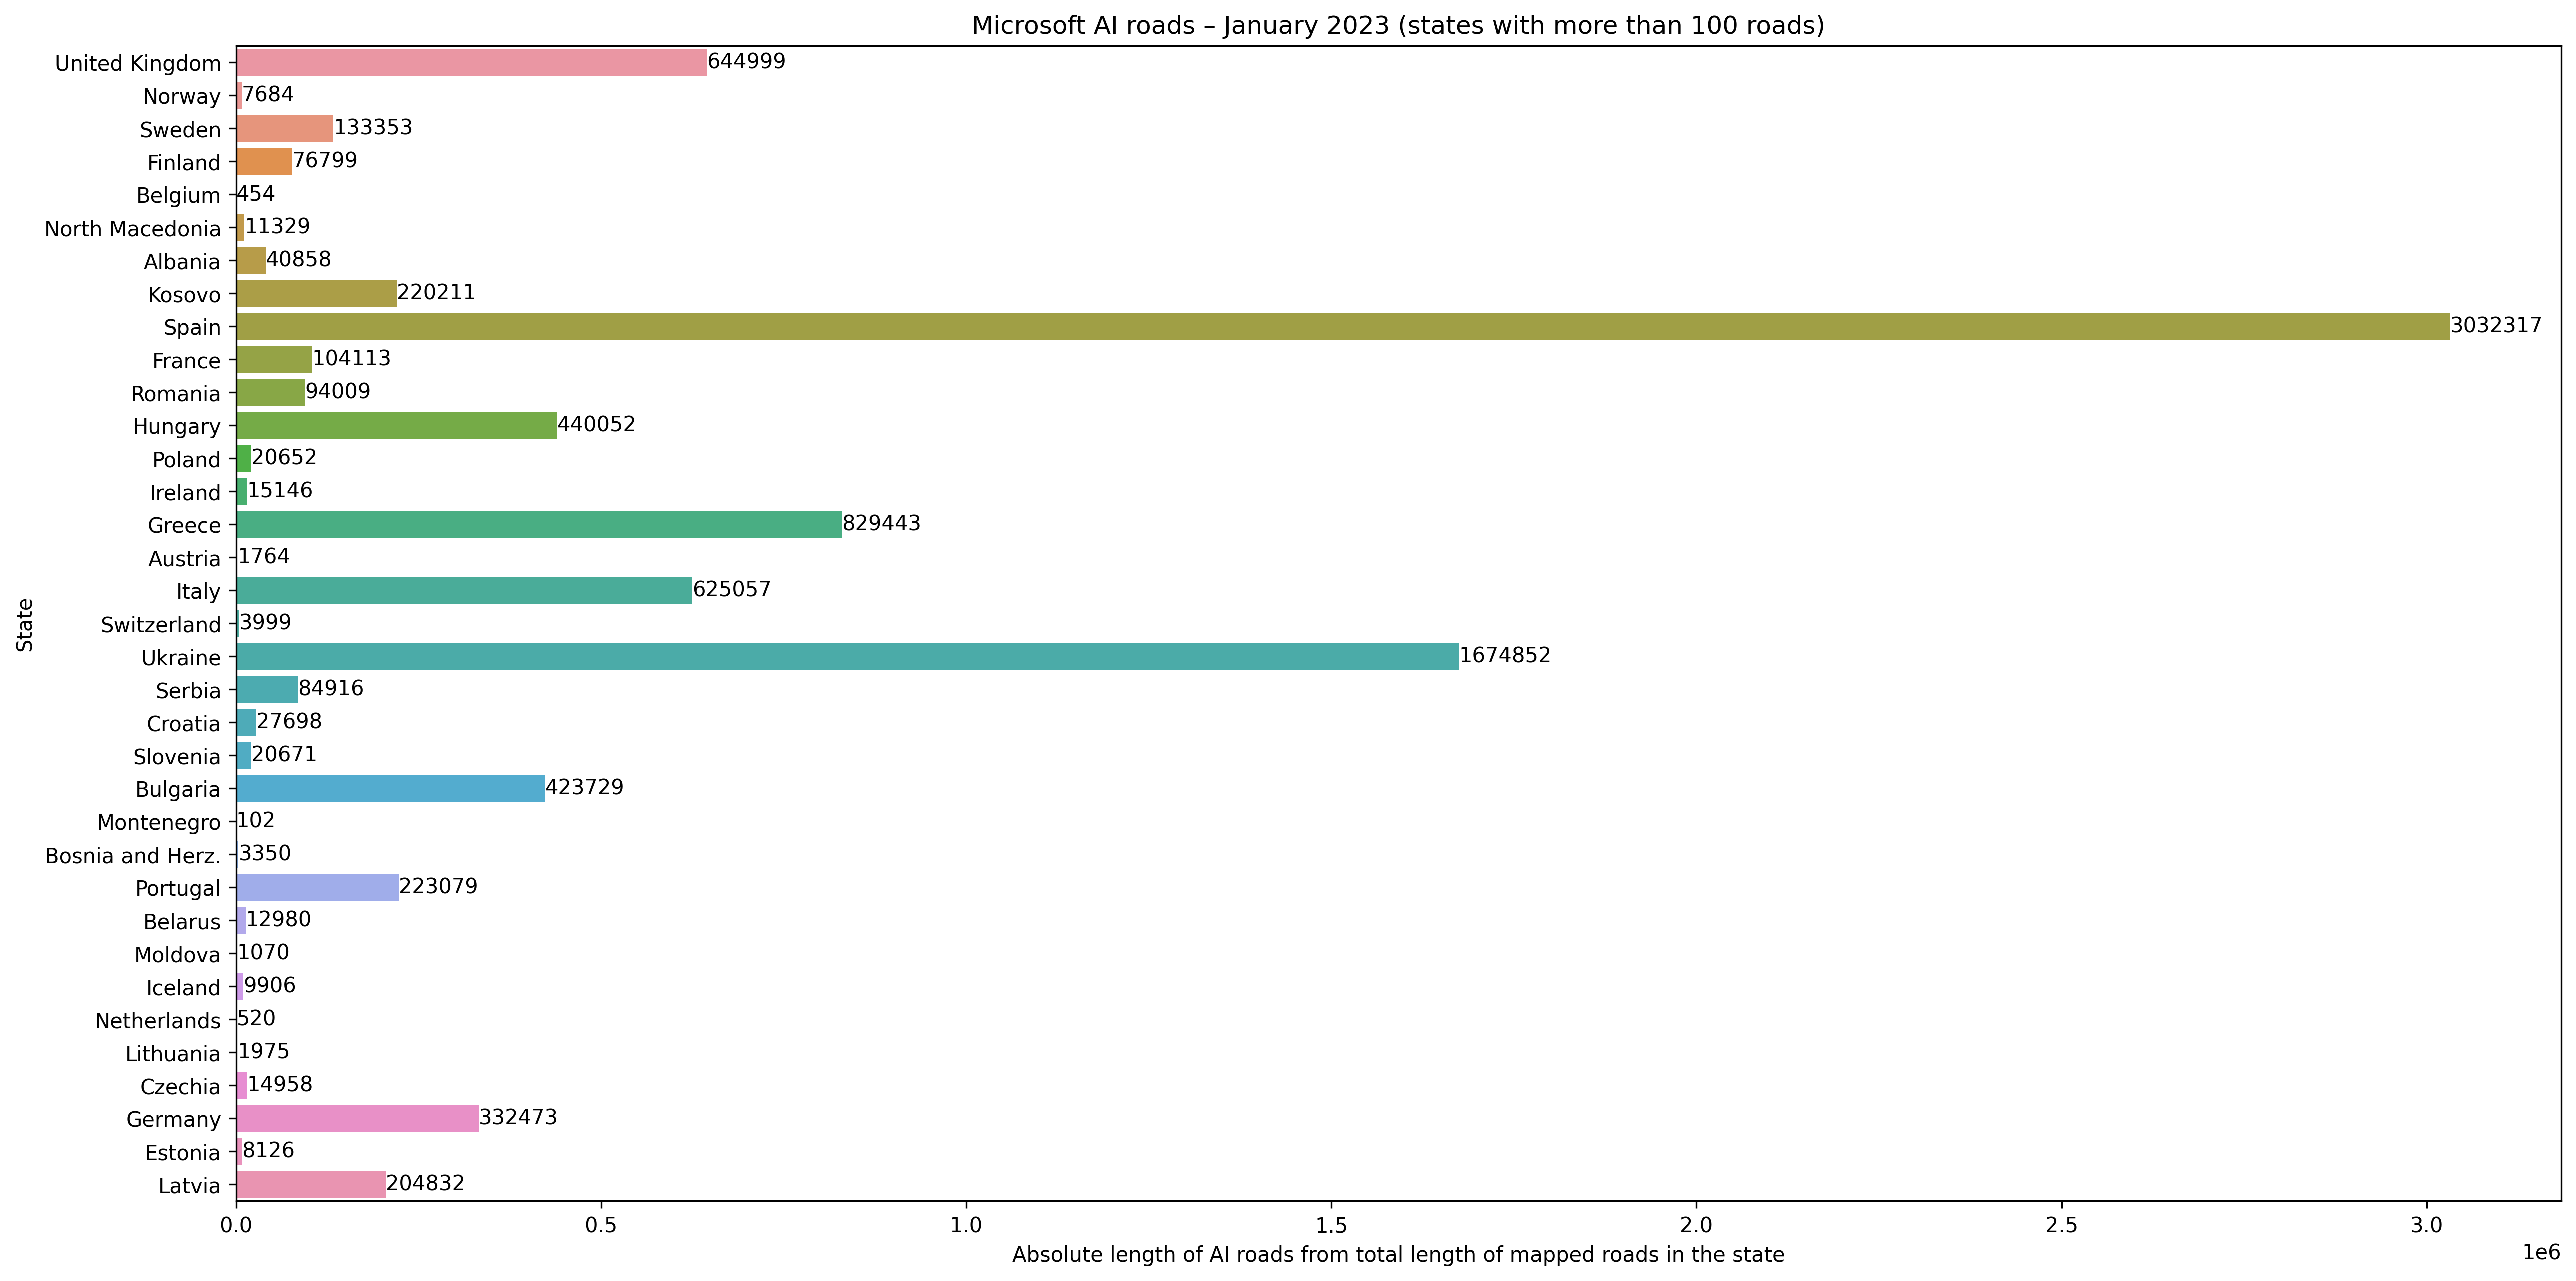

In [31]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# create horizontal barplot
sns.barplot(x=df_ai_abs["len_of_roads"],
            y=df_ai_abs["name"], orient='h', ax=ax)


# add percentage labels
for i, num in enumerate(df_ai_abs["len_of_roads"]):
    if np.isfinite(num):
        ax.text(num, i, str(int(num)), ha='left', va='center')

# Set axis labels and title
ax.set_xlabel('Absolute length of AI roads from total length of mapped roads in the state')
ax.set_ylabel('State')
ax.set_title('Microsoft AI roads – January 2023 (states with more than 100 roads)')

plt.show()


#### Plotly lib

In [32]:
# Create the horizontal percentage bar chart
fig = px.bar(df_ai_rel, x='percentage', y='name', orientation='h')

# Set the x-axis limit to 100
fig.update_xaxes(range=[0, 100])

# Customize the chart
fig.update_traces(marker_color='skyblue', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Percentage of AI roads from total length of mapped roads in the state',
                  xaxis_title='Percentage of AI roads from total length of mapped roads in the state',
                  yaxis_title='State',
                  height=1000)

# Display the chart
fig.show()
